This is 

In [2]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://github.com/surajgdesai/Shark-Attack/tree/master/DataMining/Data"
HOUSING_PATH = "/WEKAFinalInputFile.csv"
HOUSING_URL = "C:/Users/suraj/git/Shark-Attack/DataMining/Data"
csv_path = os.path.join(HOUSING_URL, "WEKAFinalInputFile.csv")
shark_data = pd.read_csv(csv_path)
shark_data.head()

,Unnamed: 0,X.2,X.1,X,Id,Date,ID,TurtleExactCountSC,turtleexactdiscretizeSC,TurtleExactCountNC,...,StationPressure_minmax,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax,turbidity_kmeans_binning,turbidty_domain
0,1,1,1,1,4,5/4/2009,25,0.0,Low,0.0,...,0.578947,0.333333,0.636021,0.032566,0.741354,0.576733,0.000000,0.933566,Low,Low
1,2,2,2,2,5,5/5/2009,33,0.0,Low,0.0,...,0.649123,0.202614,0.552312,0.037936,0.675088,0.477558,0.000000,0.114510,Low,Medium
2,3,3,3,3,7,5/7/2009,49,1.0,Low,0.0,...,0.508772,0.405229,0.496314,0.027615,0.703665,0.498185,0.000000,0.925699,Low,Low
3,4,4,4,4,8,5/8/2009,57,0.0,Low,0.0,...,0.508772,0.267974,0.579198,0.020119,0.788776,0.575743,0.000000,0.296329,Low,Low
4,5,5,5,5,11,5/11/2009,81,2.0,Low,0.0,...,0.614035,0.385621,0.597837,0.066004,0.822323,0.627393,0.004785,0.994755,Low,Medium


In [3]:
shark_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 73 columns):
Unnamed: 0                         186 non-null int64
X.2                                186 non-null int64
X.1                                186 non-null int64
X                                  186 non-null int64
Id                                 186 non-null int64
Date                               186 non-null object
ID                                 186 non-null int64
TurtleExactCountSC                 151 non-null float64
turtleexactdiscretizeSC            151 non-null object
TurtleExactCountNC                 149 non-null float64
TurtleExactCombined                186 non-null int64
TurtleexactdiscretizeNC            149 non-null object
TurtleAttackActivity               72 non-null float64
TurtleAttackActivityDiscretized    72 non-null object
Area                               72 non-null object
Location                           72 non-null object
Time                   

In [3]:
shark_data_skimmed = shark_data[['Date','turtleexactdiscretizeSC','TurtleexactdiscretizeNC','TurtleAttackActivityDiscretized','Area','Location','Timeofattack','Attack','MoonPhaseExtended','DissolvedO2discretize','salinitydiscretize','turbiditydiscretize','temperaturediscretize','precipitationdiscretize','pressurediscretize','windspeeddiscretize','precipitationmvadiscretize','CrabLandingsDisc','Degree','Direction','turbidty_domain']]

In [4]:
shark_data_skimmed.head()

,Date,turtleexactdiscretizeSC,TurtleexactdiscretizeNC,TurtleAttackActivityDiscretized,Area,Location,Timeofattack,Attack,MoonPhaseExtended,DissolvedO2discretize,...,turbiditydiscretize,temperaturediscretize,precipitationdiscretize,pressurediscretize,windspeeddiscretize,precipitationmvadiscretize,CrabLandingsDisc,Degree,Direction,turbidty_domain
0,5/4/2009,Low,Low,NaN,NaN,NaN,NaN,No,First quarter,Medium,...,Low,High,Low,Medium,Medium,Low,High,223.355556,SW,Low
1,5/5/2009,Low,Low,NaN,NaN,NaN,NaN,No,Waxing gibbous,Medium,...,Low,Medium,Low,Medium,Low,Low,Low,206.222222,SSW,Medium
2,5/7/2009,Low,Low,NaN,NaN,NaN,NaN,No,Full,Medium,...,Low,Medium,Low,Medium,Medium,Low,High,212.111111,SSW,Low
3,5/8/2009,Low,Low,NaN,NaN,NaN,NaN,No,Full,High,...,Low,High,Low,Medium,Low,Low,Low,222.977778,SW,Low
4,5/11/2009,Low,Low,NaN,NaN,NaN,NaN,No,Full,High,...,Low,High,Low,Medium,Medium,Low,High,34.022222,NE,Medium


In [4]:
shark_data_skimmed['Date']
shark_data_skimmed['MonthOfAttack'] = pd.Series([pd.to_datetime(date).month for date in shark_data_skimmed['Date']])
del shark_data_skimmed['Date']

shark_data_skimmed["Degree"] = pd.cut(shark_data_skimmed["Degree"], 5, labels=[1,2,3,4,5])
shark_data_skimmed["Degree"]

for col in ['turtleexactdiscretizeSC', 'TurtleexactdiscretizeNC', 'TurtleAttackActivityDiscretized', 'Area', 'Location', 'Timeofattack', 'Attack', 'MoonPhaseExtended', 'DissolvedO2discretize', 'salinitydiscretize', 'turbiditydiscretize', 'temperaturediscretize', 'precipitationdiscretize', 'pressurediscretize', 'windspeeddiscretize', 'precipitationmvadiscretize', 'CrabLandingsDisc', 'Direction', 'turbidty_domain']:
    shark_data_skimmed[col] = shark_data_skimmed[col].astype('category')

for col in ['turtleexactdiscretizeSC', 'TurtleexactdiscretizeNC', 'TurtleAttackActivityDiscretized', 'Area', 'Location', 'Timeofattack', 'Attack', 'MoonPhaseExtended', 'DissolvedO2discretize', 'salinitydiscretize', 'turbiditydiscretize', 'temperaturediscretize', 'precipitationdiscretize', 'pressurediscretize', 'windspeeddiscretize', 'precipitationmvadiscretize', 'CrabLandingsDisc', 'Direction', 'turbidty_domain', 'Degree']:
    shark_data_skimmed[col] = shark_data_skimmed[col].cat.codes

C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
#K modes prediction
import numpy as np
from kmodes import kmodes

km = kmodes.KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(shark_data_skimmed)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 54, cost: 1141.0
Run 1, iteration: 2/100, moves: 26, cost: 1139.0
Run 1, iteration: 3/100, moves: 1, cost: 1139.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 57, cost: 1166.0
Run 2, iteration: 2/100, moves: 13, cost: 1161.0
Run 2, iteration: 3/100, moves: 6, cost: 1161.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 57, cost: 1180.0
Run 3, iteration: 2/100, moves: 41, cost: 1136.0
Run 3, iteration: 3/100, moves: 3, cost: 1136.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 61, cost: 1164.0
Run 4, iteration: 2/100, moves: 32, cost: 1143.0
Run 4, iteration: 3/100, moves: 1, cost: 1143.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration

In [96]:
# Print the cluster centroids
print(clusters)

[0 2 2 2 0 2 2 0 2 2 3 2 0 3 0 0 3 2 3 2 2 2 2 2 2 1 2 0 2 0 0 0 0 0 2 0 0
 0 0 0 3 0 0 0 2 0 0 0 0 2 2 0 2 2 2 2 2 0 2 0 3 2 3 3 3 1 1 3 0 0 2 2 2 2
 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 2 2 2 0 2 2 2 2 2
 2 2 2 2 3 0 2 3 3 3 3 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 3 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


In [8]:
#Decision tree prediction
from __future__ import print_function

import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

features  = ['turtleexactdiscretizeSC', 'TurtleexactdiscretizeNC', 'TurtleAttackActivityDiscretized', 'Area', 'Location', 'Timeofattack', 'MoonPhaseExtended', 'DissolvedO2discretize', 'salinitydiscretize', 'turbiditydiscretize', 'temperaturediscretize', 'precipitationdiscretize', 'pressurediscretize', 'windspeeddiscretize', 'precipitationmvadiscretize', 'CrabLandingsDisc', 'Direction', 'turbidty_domain', 'Degree', 'MonthOfAttack']
OtherColumns = shark_data_skimmed[features]
TargetColumn = shark_data_skimmed['Attack']
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
clf = dt.fit(OtherColumns, TargetColumn)

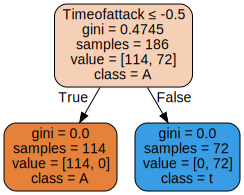

In [9]:
from sklearn import tree
import graphviz
#dot_data = tree.export_graphviz(dt, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("dt")
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features,  
                         class_names='Attack',  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)

graph

In [10]:
#K means prediction

from sklearn.cluster import KMeans
import numpy as np

shark_data_kmeans = shark_data[['Precipitation_minmax','StationPressure_minmax','WindSpeed_minmax','Salinity_minmax','Turbidity_minmax','Dissolved02_minmax','WaterTemp_minmax','Turtle_minmax','Crablandings_minmax']]

kmeans = KMeans(n_clusters=2, random_state=0).fit(shark_data_kmeans)
kmeans.labels_

kmeans.cluster_centers_

array([[ 0.05546218,  0.5748194 ,  0.40130719,  0.68564472,  0.07634452,
         0.59091762,  0.71973986,  0.18896707,  0.80387701],
       [ 0.02562942,  0.59458051,  0.29864751,  0.73342684,  0.0385373 ,
         0.61208168,  0.75439645,  0.12819177,  0.27582566]])

In [14]:
#Neural networks prediction
from sklearn.neural_network import MLPClassifier
#Neural networks prediction
from sklearn.neural_network import MLPClassifier#Neural networks prediction
from sklearn.neural_network import MLPClassifier#Neural networks prediction
from sklearn.neural_network import MLPClassifier

shark_data_neural = shark_data[['Precipitation_minmax','StationPressure_minmax','WindSpeed_minmax','Salinity_minmax','Turbidity_minmax','Dissolved02_minmax','WaterTemp_minmax','Turtle_minmax','Crablandings_minmax', 'Attack']]

shark_data_neural['Attack'] = shark_data_neural['Attack'].astype('category')
shark_data_neural['Attack'] = shark_data_neural['Attack'].cat.codes

#df = pd.DataFrame(np.random.randn(100, 2))

msk = np.random.rand(len(shark_data_neural)) < 0.7

train = shark_data_neural[msk]

test = shark_data_neural[~msk]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

clf.fit(train.ix[:, train.columns != 'Attack'], train.ix[:, train.columns == 'Attack'])

clf.predict(test.ix[:, train.columns != 'Attack'])

shark_data_neural = shark_data[['Precipitation_minmax','StationPressure_minmax','WindSpeed_minmax','Salinity_minmax','Turbidity_minmax','Dissolved02_minmax','WaterTemp_minmax','Turtle_minmax','Crablandings_minmax', 'Attack']]

shark_data_neural['Attack'] = shark_data_neural['Attack'].astype('category')
shark_data_neural['Attack'] = shark_data_neural['Attack'].cat.codes

#df = pd.DataFrame(np.random.randn(100, 2))

msk = np.random.rand(len(shark_data_neural)) < 0.7

train = shark_data_neural[msk]

test = shark_data_neural[~msk]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

clf.fit(train.ix[:, train.columns != 'Attack'], train.ix[:, train.columns == 'Attack'])

clf.predict(test.ix[:, train.columns != 'Attack'])

shark_data_neural = shark_data[['Precipitation_minmax','StationPressure_minmax','WindSpeed_minmax','Salinity_minmax','Turbidity_minmax','Dissolved02_minmax','WaterTemp_minmax','Turtle_minmax','Crablandings_minmax', 'Attack']]

shark_data_neural['Attack'] = shark_data_neural['Attack'].astype('category')
shark_data_neural['Attack'] = shark_data_neural['Attack'].cat.codes

#df = pd.DataFrame(np.random.randn(100, 2))

msk = np.random.rand(len(shark_data_neural)) < 0.7

train = shark_data_neural[msk]

test = shark_data_neural[~msk]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

clf.fit(train.ix[:, train.columns != 'Attack'], train.ix[:, train.columns == 'Attack'])

clf.predict(test.ix[:, train.columns != 'Attack'])
shark_data_neural = shark_data[['Precipitation_minmax','StationPressure_minmax','WindSpeed_minmax','Salinity_minmax','Turbidity_minmax','Dissolved02_minmax','WaterTemp_minmax','Turtle_minmax','Crablandings_minmax', 'Attack']]

shark_data_neural['Attack'] = shark_data_neural['Attack'].astype('category')
shark_data_neural['Attack'] = shark_data_neural['Attack'].cat.codes

#df = pd.DataFrame(np.random.randn(100, 2))

msk = np.random.rand(len(shark_data_neural)) < 0.7

train = shark_data_neural[msk]

test = shark_data_neural[~msk]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

clf.fit(train.ix[:, train.columns != 'Attack'], train.ix[:, train.columns == 'Attack'])

clf.predict(test.ix[:, train.columns != 'Attack'])

C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
C:\Users\suraj\Anaconda3\lib\s

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1], dtype=int8)